<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 148.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 176.4 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 174.0 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-19 05:17:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  46.4MB/s    in 3.5s    

2025-07-19 05:17:47 (42.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



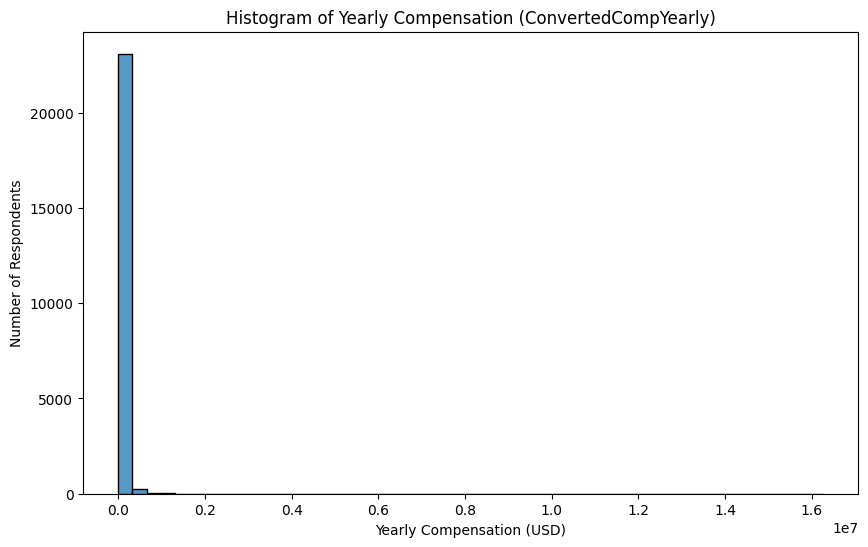

In [5]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values from ConvertedCompYearly
comp_data = df['ConvertedCompYearly'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(comp_data, bins=50, kde=False)
plt.title('Histogram of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



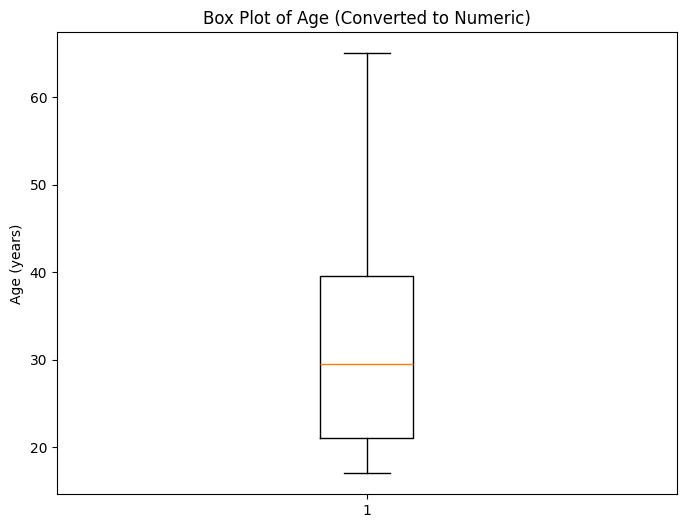

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Example mapping from age categories to numeric values (midpoint of range)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}

# Convert Age to numeric
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing Age_numeric if any
df_age = df.dropna(subset=['Age_numeric'])

# Plot box plot
plt.figure(figsize=(8,6))
plt.boxplot(df_age['Age_numeric'])
plt.title('Box Plot of Age (Converted to Numeric)')
plt.ylabel('Age (years)')
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



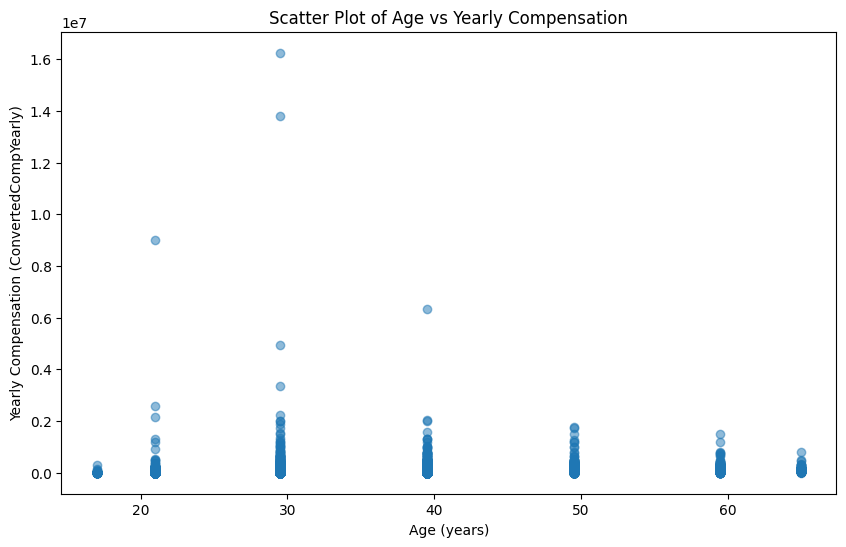

In [7]:
import matplotlib.pyplot as plt

# Drop rows with missing values in Age_numeric or ConvertedCompYearly
df_scatter = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

plt.figure(figsize=(10,6))
plt.scatter(df_scatter['Age_numeric'], df_scatter['ConvertedCompYearly'], alpha=0.5)
plt.title('Scatter Plot of Age vs Yearly Compensation')
plt.xlabel('Age (years)')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


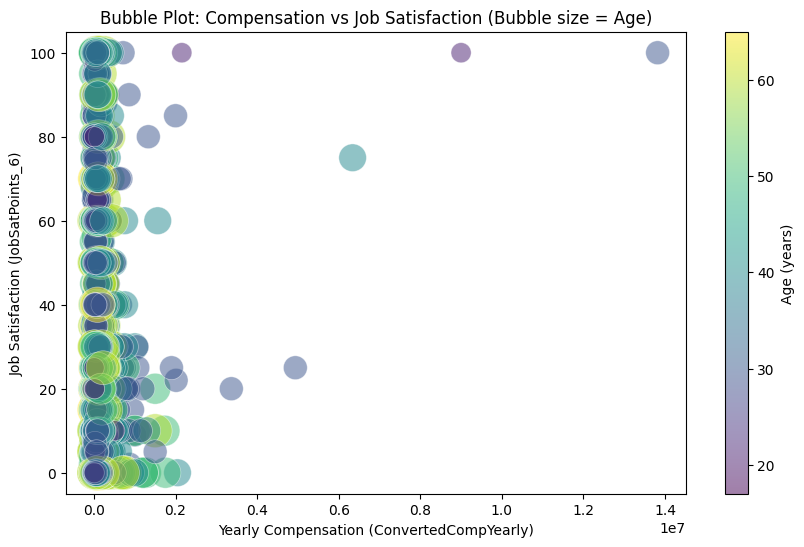

In [8]:
import matplotlib.pyplot as plt

# Clean data - remove rows with missing values in needed columns
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Scale bubble sizes by age (optional: multiply to increase size visibility)
bubble_size = df_bubble['Age_numeric'] * 10

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df_bubble['ConvertedCompYearly'], 
    df_bubble['JobSatPoints_6'], 
    s=bubble_size, 
    alpha=0.5,
    c=df_bubble['Age_numeric'], 
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Age (years)')
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble size = Age)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



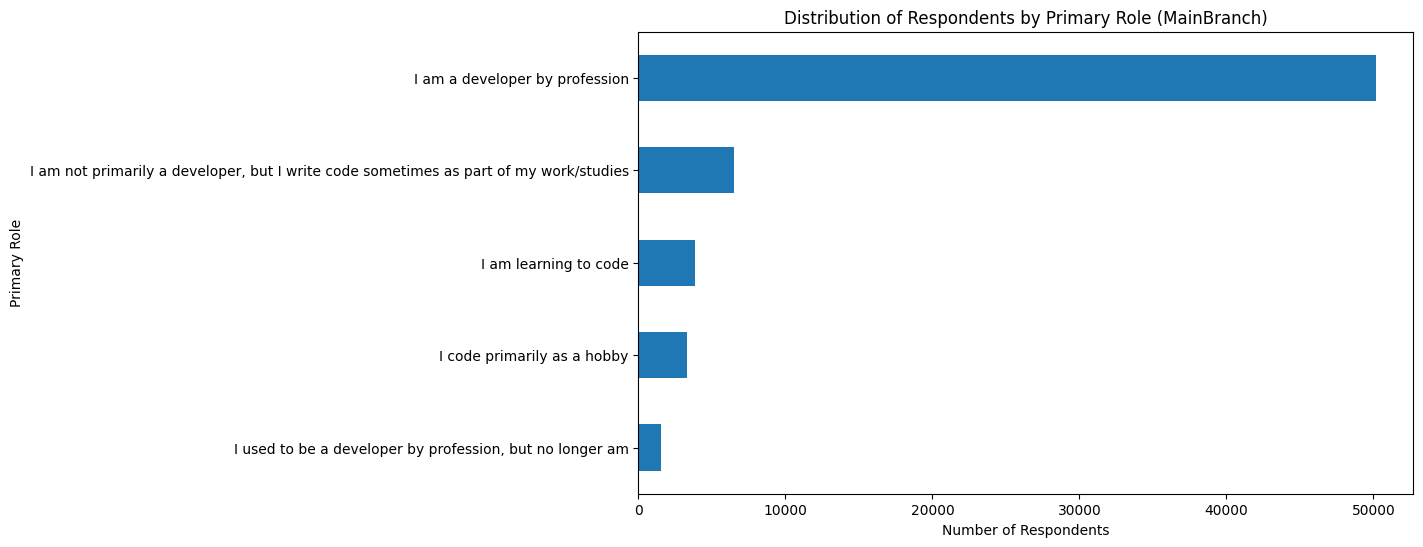

In [9]:
import matplotlib.pyplot as plt

# Count the frequency of each MainBranch category
mainbranch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
mainbranch_counts.plot(kind='barh')
plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.gca().invert_yaxis()  # To have the highest count on top
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



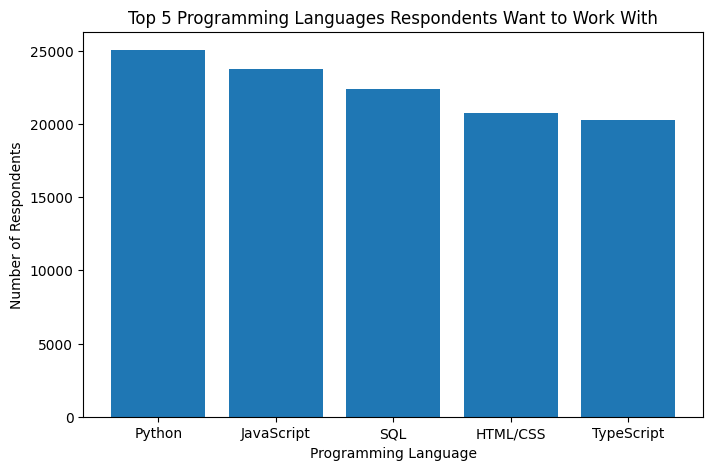

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Drop missing values and split the 'LanguageWantToWorkWith' column by ';'
lang_want = df['LanguageWantToWorkWith'].dropna().str.split(';')

# Flatten the list of lists into a single list and strip extra spaces
langs = [lang.strip() for sublist in lang_want for lang in sublist]

# Count frequency of each language
lang_counts = Counter(langs)

# Get the top 5 most desired languages
top5_langs = lang_counts.most_common(5)

# Separate language names and counts
languages, counts = zip(*top5_langs)

# Plot vertical bar chart
plt.figure(figsize=(8,5))
plt.bar(languages, counts)
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


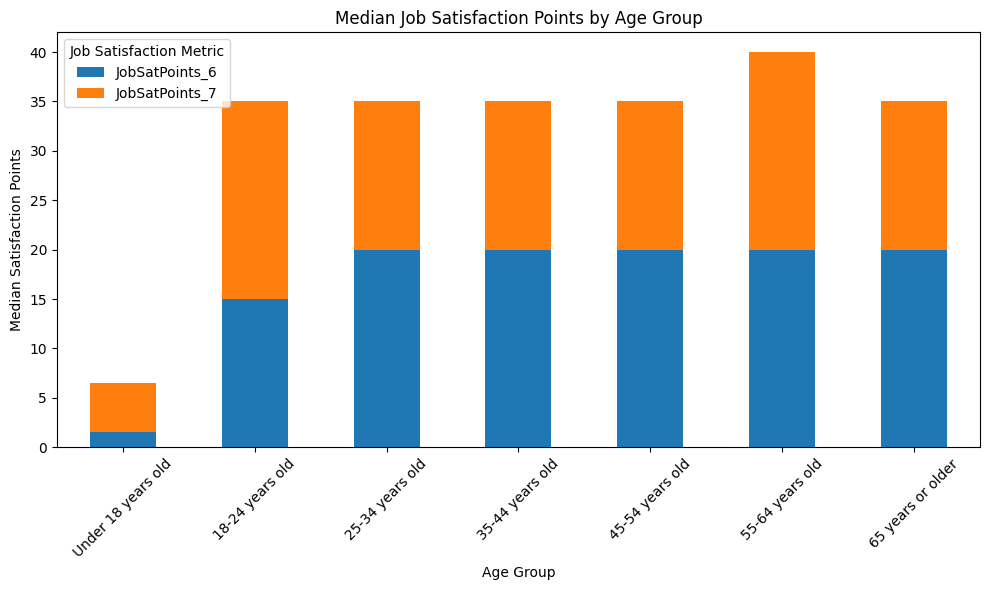

In [11]:
import matplotlib.pyplot as plt

# Group by Age and calculate medians for JobSatPoints_6 and JobSatPoints_7
median_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort by Age if Age is categorical with order (optional)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

median_job_sat = median_job_sat.reindex(age_order)

# Plot stacked bar chart
ax = median_job_sat.plot(kind='bar', stacked=True, figsize=(10,6))

ax.set_title('Median Job Satisfaction Points by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Satisfaction Points')

plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Metric')
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



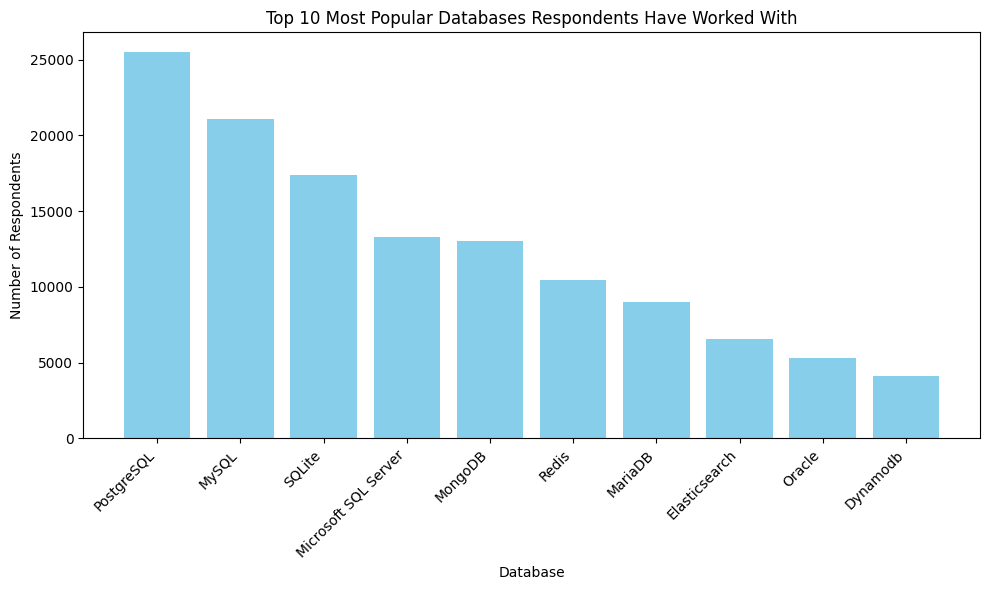

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# Drop rows with missing data in the column to avoid errors
db_data = df['DatabaseHaveWorkedWith'].dropna()

# Split each entry by ';' to get a list of databases per respondent
db_lists = db_data.str.split(';')

# Flatten the list of lists into a single list with all databases
all_databases = [db.strip() for sublist in db_lists for db in sublist]

# Count frequency of each database
db_counts = Counter(all_databases)

# Convert to DataFrame for plotting and sort by count descending
db_counts_df = (
    pd.DataFrame(db_counts.items(), columns=['Database', 'Count'])
    .sort_values(by='Count', ascending=False)
)

# Optional: Select top 10 most popular databases to keep the chart clean
top_db_counts_df = db_counts_df.head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(top_db_counts_df['Database'], top_db_counts_df['Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Popular Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_300/3551873920.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp['Age'] = pd.Categorical(df_comp['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_300/3551873920.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp_by_age = df_comp.groupby('Age')['ConvertedCompYearly'].median().reindex(age_order)


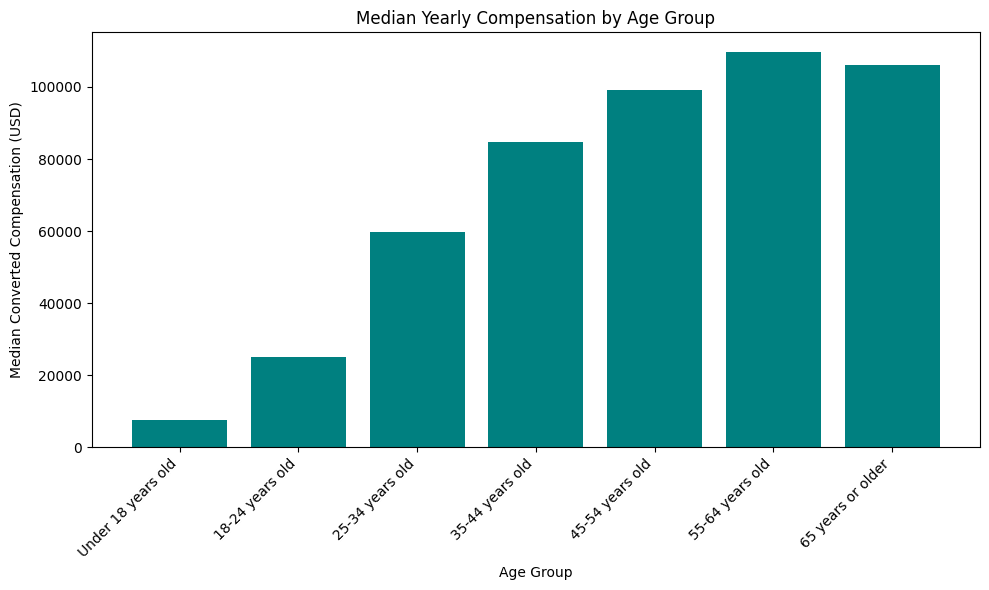

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your dataframe and it includes 'Age' and 'ConvertedCompYearly'

# Drop missing compensation data
df_comp = df.dropna(subset=['ConvertedCompYearly', 'Age'])

# Map Age categories to a proper order if needed (optional but recommended for clear x-axis)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
    '45-54 years old', '55-64 years old', '65 years or older'
]
df_comp['Age'] = pd.Categorical(df_comp['Age'], categories=age_order, ordered=True)

# Calculate median compensation per age group
median_comp_by_age = df_comp.groupby('Age')['ConvertedCompYearly'].median().reindex(age_order)

# Plot grouped bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(median_comp_by_age.index, median_comp_by_age.values, color='teal')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
